# Semana 1 - Resolução dos exercícios de fixação

Esse notebook contém a solução dos exercícios de fixação da semana 1 de Introdução a Ciências de Dados. A ideia é os alunos tentarem solucionar os exercícios sem olhar as respostas primeiro e depois conferir.

Não é necessário entregar os exercícios abaixo, mas é bom resolvê-los para fixar os conteúdos estudados.

Para cada exercício, um comentário é feito em markdown explicando o conceito do exercício. Nesse momento é muito mais importante entender o funcionamento do método e sua utilidade do que o código em si, então não se preocupe tanto com ele.

Qualquer dúvida procure um tutor no fórum ou na monitoria :)

Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

In [3]:
# Para começar vamos importar bibliotecas e funções que estão sendo utilizadas

# Biblioteca muito utilizada para calculos em python (talvez a mais importante), 
# é bem usual chama-la renomeando para np para evitar de ficar escrevendo numpy toda vez que formos utiliza-la 
import numpy as np 

# Biblioteca onde muitas funções estatisticas estao disponiveis, 
#como vamos utilizar apenas algumas funções específicas vamos importar apenas as funções que formos utilizar
from scipy.stats import entropy, pearsonr, spearmanr

# Biblioteca para realizar plots de graficos 
import matplotlib.pyplot as plt 

### Exercício 1

> Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

#### *Solução*

A entropia é uma medida utilizada no meio estatístico para mensurar incertezas em distribuições ou sistemas. O objetivo desse exercício é observar essa "incerteza" no lançamento de uma moeda.

Para montar o gráfico, siga essas etapas:  
- Crie um vetor de probabilidades para cair um lado da moeda (de 0 a 1). Veja função np.arange() do numpy
- Use um laço "for" e salve em um vetor a entropia de "p" e "1-p" que, nesse caso, seria a probabilidade para cair o outro lado da moeda.
- Utilize a biblioteca matplotlib para criar o gráfico.

Podemos observar que temos um alto grau de incerteza quando a probabilidade é 0.5 para cada um dos lados da moeda. A entropia alcança o valor 0 quando temos probabilidade 100% de cair somente um lado da moeda sempre.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.0, 0.46899559358928117, 0.7219280948873623, 0.8812908992306927, 0.9709505944546688, 1.0, 0.9709505944546686, 0.8812908992306926, 0.7219280948873623, 0.46899559358928117, 0.0]


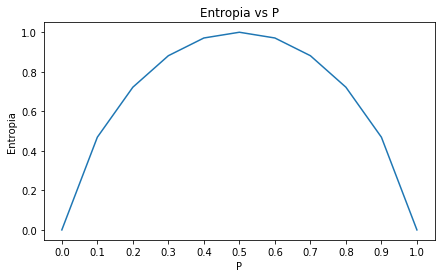

In [5]:
# Estamos criando um vetor (sequencia de varios elementos) de 0 até 1.1 com espaços de 0.1, logo
# probabilidades = [0, 0.1, 0,2 ..., 1.0] cabe ressaltar que os intervalos são da forma [0, 1.1) 
# ou seja 1.1 não é incluso nessa lista 
probabilidades = np.arange(0, 1.1, 0.1) 
print (probabilidades)
H = [] # Criando uma lista vazia para armazenas as entropias

# Para cada elemento do vetor, vamos calcular a entropia
for p in probabilidades: 
    
    # Para isso, passamos os dois elementos necessarios 
    # (a propabilidade de ocorrer determinado evento,  e 1-p que é a prob de não ocorrer)
    # a função exige que sejam passados como uma lista, por isso usamos [p, 1-p]. 
    # O resultado desse calculo é adicionado em uma lista de entropias base=2 é outro parametro
    # da função pois por padrão ela considera e e a formula da entropia que vimos usa base 2
    H.append(entropy([p, 1-p], base=2))

print(H)
# Para realizar o plot primeiro utilizamos essa função plt.subplots (que retorna tanto a
# figura em si, quanto os eixos da figura, o figsize é um parâmetro de ajuste do tamanho da figura)
fig, ax = plt.subplots(figsize=(7, 4))

# Agora que criamos os plots vamos adcionar no eixo x as probailidades e no eixo y as entropias
plt.plot(probabilidades, H)

# Vamos adcionar uma legenda para o eixo x
plt.xlabel('P')

# O mesmo para o eixo y
plt.ylabel('Entropia')

# E agora um titulo para o grafico
plt.title('Entropia vs P')

# Para mostrar todos os valores do vetor de probabilidades no eixo x utilizamos o set_xticks
# do contrario o proprio plot decide qual o melhor espacamento levando em consideração o tamanho da figura
ax.set_xticks(probabilidades)

# Por fim vamos exibir o plot na tela
plt.show()

### Exercício 2

> Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

#### *Solução*

Usem a biblioteca numpy para gerar um vetor X com a distribuição de Poisson. O argumento "size" diz o tamanho desse vetor e o "lam" é o parâmetro lambda da distribuição.

É esperado esse resultado pois em uma distribuição de poisson E[X] = lambda e Var[X] = lambda.

In [3]:
# Vamos utilizar a função possion da numpy.random para gerar os elementos
# ela recebe como parametro lambda (que é um parâmetro da distribuição)
# e o número de elementos contidos no vetor
X = np.random.poisson(lam=4, size=100000)

# Calculamos a media e variancia do vetor
media = np.mean(X)
variancia = np.var(X)

# Mostrando o resultado. 
# Para a função de print, estamos passando f'' que é uma forma comum de printar os resultados.
# dentro dessas aspas simpes colocamos o texto, e entre {} as variaveis, o número de casas
# decimais é dado pelo :.3f  nesse caso 3 casas, que também é colocado dentro das {}
print(f'Média: {media:.3f}, Variância: {variancia:.3f}')

Média: 3.994, Variância: 3.971


### Exercício 3

> Calcula e a divergência de Kullback-Leibler entre as distribuições Normal e Poisson. Gerem os dados com mesma média e variância.

#### Solução

A divergência de Kullback-Leibler mede como uma distribuição se difere de outra. Apesar de ser usada como uma função para ver "distância", não pode ser considerada assim pois é assimétrica. Ou seja, o resultado de entropy(X_norm, X_pois) e entropy(X_pois, X_norm) são diferentes. Sua formula é a seguinte:

$$KL(p||q) = \sum_x p(x) log\frac{p(x)}{q(x)}$$

Para calcular a divergencia precisamos das distruições $p(x)$ e $q(x)$, isto é, para cada valor de $x$ precisamos saber sua probabilidade. **Vamos obter essas probabilidades atráves de uma simulação** (no exércicio 4 usaremos outro método), ou seja, iremos gerar uma grande quantidade de dados utilizando as distribuições especificadas e contar quantas vezes cada um deles aparece. **A probabilidade de um valor aparecer será dada pelo número de ocorrencias dividido pelo total de dados**.

Agora só temos um problema extra para resolver, a distribuição normal é para dados contínuos (números reias) mas a Poisson é para dados discretos (números inteiros). Vamos resolver esse problema separando nossos dados em bins ou "caixas", todo numero dentro do intervalo \[1, 2) será tratado como 1, todo número dentro de [2, 3) como 2 e assim em diante. Dessa forma para cada número inteiro teramos seu número de ocorrencias.

KL(normal||poisson) = 0.4912866293296128
KL(poisson||normal) = inf


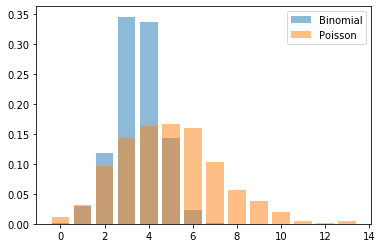

In [4]:
# Definindo o número de dados que iremos gerar na nossa simulação
N = 1000

# Vamos utilizar a função np.random.normal para gerar N dados vindos de uma distri-
# buição normal. Perceba que passamos como parâmetro a média e a variancia da normal
# que estamos amostrando, parametros loc e scale respectivamente
X_norm = np.random.normal(loc=4, scale=1, size=N)

# Processo analogo para os dados vindos da distribuição de Poisson
X_pois = np.random.poisson(lam=5, size=N)

# Vamos pegar o menor e o maior dado gerado pelas duas distribuições, para
# isso vamos pegar o minimo entre o menor valor de cada e máximo entre o maior
# valor de cada.
min_val = min(np.min(X_norm), np.min(X_pois))
max_val = max(np.max(X_norm), np.max(X_pois))

# Bins especificam os intervalos que as contagens serão realizadas, por exemplo:
# bins = [0, 1, 2, 3] ira contar os valores entre [0, 1), [1, 2), [2, 3)
# já bins = [0, 2, 4, 6] ira contar os valores entre [0, 2), [2, 4), [4, 6)
# No nosso caso vamos do floor(arrendondar decimal para inteiro de baixo) do menor
# até o floor do maior. Estamos somando dois porque tanto o intervalo do arange, quanto o
# dos bins é aberto. (Não se preocupe tanto com esses detalhes de código, logo tudo vai
# ficar mais claro :D)
bins = np.arange(np.floor(min_val), np.floor(max_val)+2)

# A função np.histogram realiza a contagem dos valores dentro de intervalo e retorna duas
# listas, uma com as contagens e outra com os bins usados para realizar a contagem
p_norm = np.histogram(X_norm, bins=bins)
p_pois = np.histogram(X_pois, bins=bins)

# Vamos pegar apenas as contagens e para os valores vamos usar apenas as partes de baixo de 
# cada intervalo (ignoramos o ultimo pq como vimos o intervalo vai de bins[n] a bins[n+1])
# já que como dito iremos contar 2.5 como 2, por exemplo.
p_norm, p_pois, values = p_norm[0], p_pois[0], p_norm[1][:-1]

# Vamos dividir cada ocorrencia pelo somatorio total dos dados para obter um valor
# entre 0 e 1, podendo portanto representar uma probabilidade
p_norm, p_pois = p_norm / np.sum(p_norm), p_pois / np.sum(p_pois)

# Vamos olhar como essas distribuições ficaram em um gráfico (não seria obrigatório)
plt.bar(values, p_norm, alpha=0.5, label='Binomial')
plt.bar(values, p_pois, alpha=0.5, label='Poisson')
plt.legend()

# Vamos calcular a divergencia KL. Perceba que invertendo as distribuições não temos o mesmo resultado
print('KL(normal||poisson) =', entropy(p_norm, p_pois))
print('KL(poisson||normal) =', entropy(p_pois, p_norm))

### Exercício 4

> Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância.

#### Solução

Dessa vez, como ambas as distribuições de interesse são discretas, nosso trabalho será mais simples. **Ao invés de obter os dados com uma simulação usaremos o próprio valor téorico da probabilidade**, de acordo com cada distribuição. Por exemplo, sabemos que a probabilidade para um $x$ qualquer com dados vindos de uma distribuição binomial com $n$ repetições e probabilidade de sucesso $p$ é dado por:

$$P(X=x) = {n\choose x}p^x(1-p)^{n-x}$$

Então podemos simplesmente **calcular essa probabilidades para vários valores $x$ usando as fórmulas das distribuições**.

Por sorte a biblioteca scipy já possui funções que calculam esses valores sem mesmo precisarmos usar as fórmulas. Iremos usar essas funções para obter as probabilidades de cada x em ambas as distribuições e com esses valores calcular a divergencia KL.


KL(binomial||poisson) = 0.261074350708247
KL(poisson||binomial) = inf


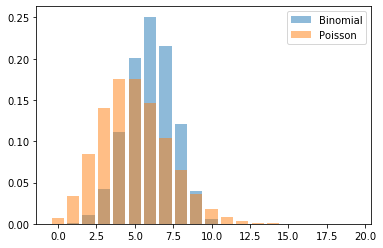

In [5]:
# Importando as funções que irão calcular as probabilidades
from scipy.stats import binom, poisson

# Gerando um vetor com os valores que iremos calcular a probabilidade
# no caso numeros de 0 até 20
values = np.arange(20)

# Estamos especificando que queremos um distribuição binomial com n=10 e p=5,
# em seguida pedimos a função massa de probabilidade (probability mass function - pmf)
# para os valores que definimos anteriormente
p_bin = binom(10, 0.6).pmf(values)

# Processo análogo, porem dessa vez para uma distribuição poisson com lambda = 5
p_pois = poisson(5).pmf(values)

# Vamos observar as distribuições geradas (não seria obrigatório)
plt.bar(values, p_bin, alpha=0.5, label='Binomial')
plt.bar(values, p_pois, alpha=0.5, label='Poisson')
plt.legend()

# Finalmente podemos calcular a divergencia KL
print('KL(binomial||poisson) =', entropy(p_bin, p_pois))
print('KL(poisson||binomial) =', entropy(p_pois, p_bin))

### Exercício 5

> Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

#### Solução

A função np.arange(10,100,10) retorna um vetor que começa em 10, termina em 100 e "caminha" de 10 em 10. Usamos esse vetor para criar os intervalos para a função log() e cada laço do "for" deve calcular um valor de correlações de Pearson e Spearman.

A correlação de Pearson é igual a 1 se, conforme uma variável x aumenta, a variável y continua a aumentar em uma proporção que é sempre a mesma. A correlação de Spearman não leva em conta essa proporção.

Conforme usamos um intervalo maior da função log, essa "proporção" citada acima se torna cada vez menor pois a função vai se estabilizando mesmo com x aumentando (como pode ser visto no gráfico), então, a correlação de Pearson se torna cada vez menor, porém, a de Spearman é constante.

In [6]:
# Variando o tamanho do intervalo, cabe ressaltar que o inicio é fixo em 1
for stop in np.arange(10, 100, 10):
    
    # Vamos criar um vetor de 1000 elementos igualmente espaçados entre start e stop
    x = np.linspace(start=1, stop=stop, num=1000)
    
    # Aplicando a função logaritmica
    y = np.log(x)
    
    # Calculando a correlação de pearson e de spearman
    # Como as funções abaixo retornam também o valor p, mas não é algo que será utilizado no exercício
    # atribuimos a uma variavel qualquer, nesse caso _
    corr_pearson, _ = pearsonr(x, y)
    corr_spearman, _ = spearmanr(x, y)
    
    print(f'Intervalo [1, {stop}] - Pearson: {corr_pearson:.2f}, Spearman: {corr_spearman}')

Intervalo [1, 10] - Pearson: 0.96, Spearman: 1.0
Intervalo [1, 20] - Pearson: 0.94, Spearman: 1.0
Intervalo [1, 30] - Pearson: 0.93, Spearman: 1.0
Intervalo [1, 40] - Pearson: 0.93, Spearman: 1.0
Intervalo [1, 50] - Pearson: 0.92, Spearman: 1.0
Intervalo [1, 60] - Pearson: 0.92, Spearman: 1.0
Intervalo [1, 70] - Pearson: 0.91, Spearman: 1.0
Intervalo [1, 80] - Pearson: 0.91, Spearman: 1.0
Intervalo [1, 90] - Pearson: 0.91, Spearman: 1.0


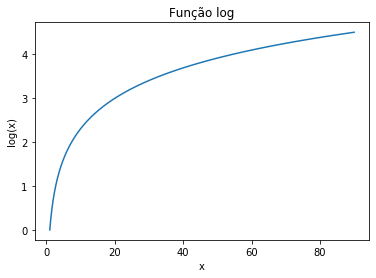

In [7]:
plt.plot(x, y)
plt.title("Função log")
plt.xlabel("x")
plt.ylabel("log(x)");